In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from imcp import mcp_curve, mcp_score, plot_mcp_curve, imcp_curve, imcp_score, plot_imcp_curve, plot_curve
import pandas as pd

# MCP curve plot and area

## Iris dataset

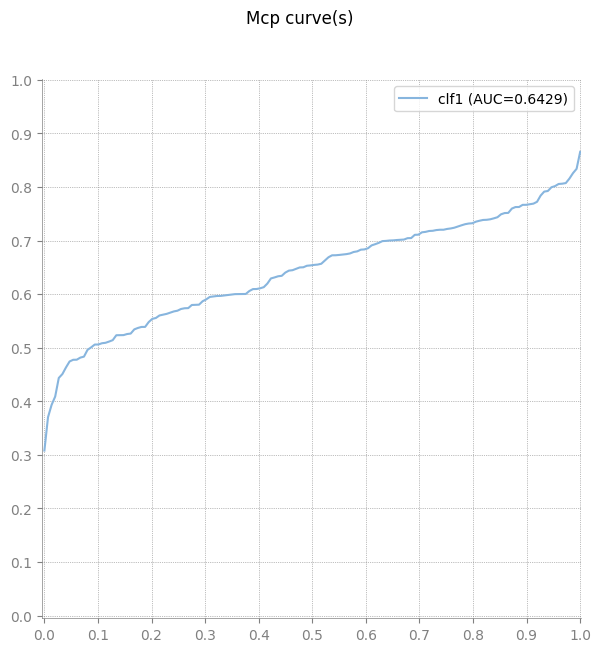

Area under mcp curve is approximately equal to 0.64294511633598


In [2]:
# iris dataset
X, y = load_iris(return_X_y=True)

clf = LogisticRegression(solver="liblinear").fit(X, y)
probabilities = clf.predict_proba(X)
plot_mcp_curve(y, probabilities)

area = mcp_score(y, probabilities)
print("Area under mcp curve is approximately equal to {}".format(area))

More plots can be drawn on the same figure to make comparison between curves easier. Example below presents curves calculated for different ways of obtaining class probabilities.

Area under mcp curve for LogisticRegression is equal to 0.64294511633598
Area under mcp curve for RandomForestClassifier is equal to 0.9549343374639889
Area under mcp curve for GradientBoostingClassifier is equal to 0.9927229357094987
Area under mcp curve for SVC is equal to 0.8416057643008084


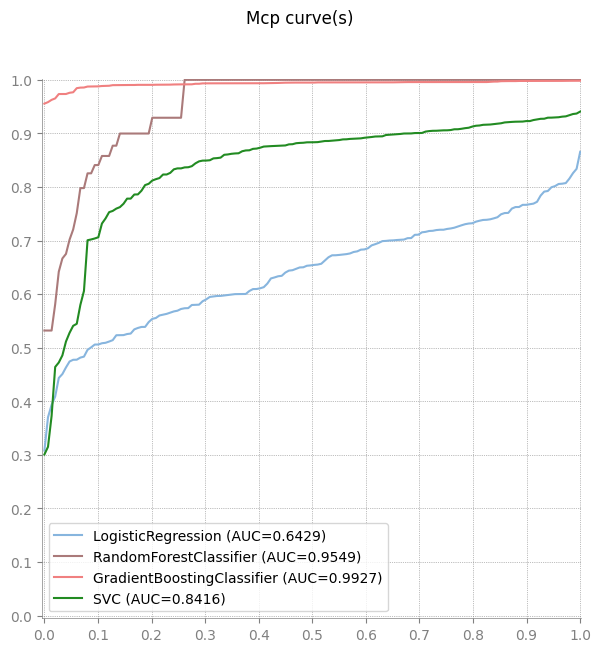

In [3]:
X, y = load_iris(return_X_y=True)
algorithms = {'LogisticRegression': LogisticRegression(solver='liblinear'),
             'RandomForestClassifier': RandomForestClassifier(random_state=42),
             'GradientBoostingClassifier': GradientBoostingClassifier(),
             'SVC': SVC(probability=True),}

scores = {}
for key in algorithms:
    algorithms[key].fit(X, y)
    score = algorithms[key].predict_proba(X)
    scores[key] = score
    area = mcp_score(y, score)
    print('Area under mcp curve for {} is equal to {}'.format(key, area))

plot_mcp_curve(y, scores)

## Different dataset

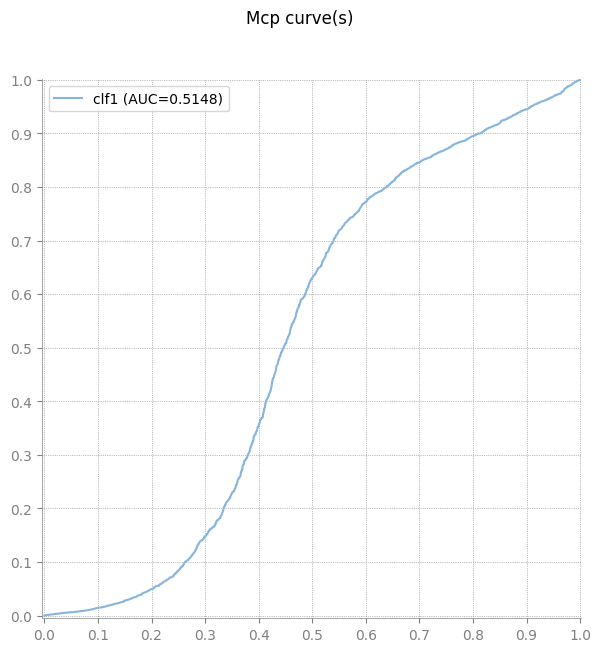

Area under mcp curve is approximately equal to 0.5147802720754062


In [4]:
df = pd.read_csv("../tests/test_results.csv")
y_true = df['y_true']
y_score = df.loc[:, 'y_score_1':]

plot_mcp_curve(y_true, y_score)

area = mcp_score(y_true, y_score)
print("Area under mcp curve is approximately equal to {}".format(area))

# Imbalanced curve

It is also possible to take into account disproportion of class distribution amongst given dataset. In such case, the width of bar for each sample is scaled. Class which covers less samples in the dataset will have wider bars.

There have been implemented analogous methods for all mcp methods - imcp_curve, imcp_score and plot_imcp_curve. 

Also, in case that user wants to plot, for example, regular curve and imbalanced curve on the same plot, the plot_curve method has been developed. It allows user to plot any number of curves given as arguments in the same style as plot_mcp_curve and plot_imcp_curve. It is also possible to save figure plot with that method after user has specified output figure path.

## Single imcp curve

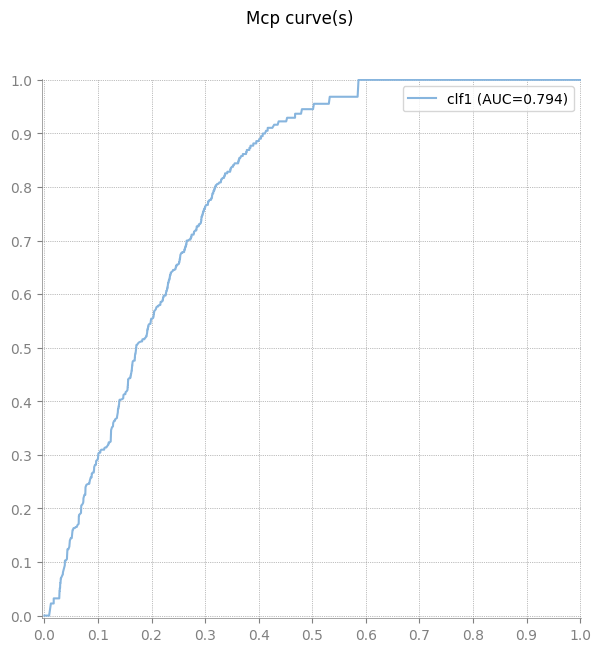

Area under mcp curve is approximately equal to 0.7940007448182574


In [5]:
df = pd.read_csv('../tests/test_imbalanced_class_probs.csv')

y_true = df["y_true"]
y_score = df.drop(["y_true"], axis=1)

plot_imcp_curve(y_true, y_score, abs_tolerance=0.0000001)

area = imcp_score(y_true, y_score, abs_tolerance=0.0000001)
print("Area under mcp curve is approximately equal to {}".format(area))

## Multiple curves

Plotting regular mcp and imcp on the same figure

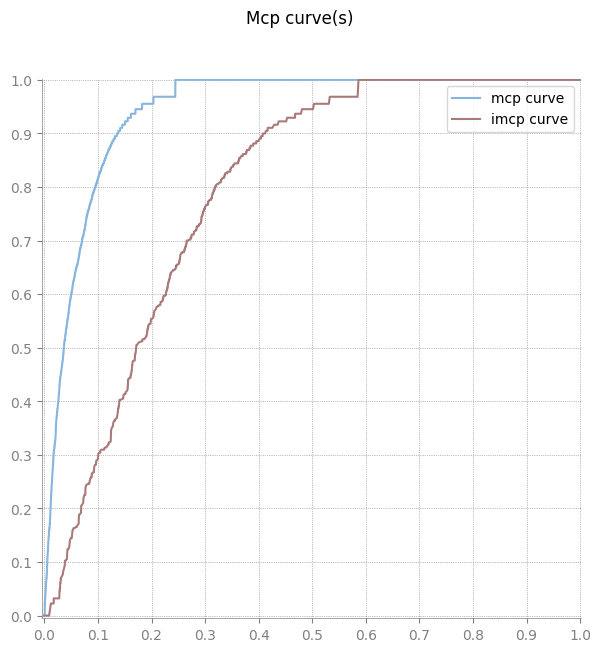

In [6]:
mcp_x, mcp_y = mcp_curve(y_true, y_score, abs_tolerance=0.0000001)
imcp_x, imcp_y = imcp_curve(y_true, y_score, abs_tolerance=0.0000001)

plot_curve([mcp_x, imcp_x], [mcp_y, imcp_y], label=["mcp curve", "imcp curve"])